# Data Processing


In [3]:
# Generate the stamp for today's date
from datetime import datetime
today = str(datetime.now().strftime("%Y%m%d"))
print(today)

20260224


## Mathematical illustrative example

In [ ]:
# Original data
ldbd_dantzig_points_20260216095139 = [(5, 1), (1, 5), (5, 4), (1, 2), (3, 3), (3, 4), (2, 3)]
# ldbd_pc_points = [(5, 1), (1, 5), (5, 4), (1, 2), (3, 3), (3, 4), (2, 3)]
ldbd_paper_points = [(5, 1), (1, 5), (4, 1), (2, 4), (2, 3), (3, 2), (2, 3)]

ldsda_dantzig_points_20260216095139 = [(5, 1), (4, 2), (4,3)]
# ldsda_pc_points = [(5, 1), (4, 2), (4,3)]
ldsda_paper_points = [(5, 1), (4, 2), (4,3)]

# Check and create the folder if it does not exist
import os
folder_path = fr"D:\Data\Proj\SECQUOIA\Pyomos\LD_benchmark\results\{today}"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [ ]:
import matplotlib.pyplot as plt

def plot_point_sequence(points, figure_path=None, title=None):
    e1_coords = [p[0] for p in points]
    e2_coords = [p[1] for p in points]

    fig, ax = plt.subplots(figsize=(7, 7))

    # 1. Draw the sequential path with arrows
    for i in range(len(points) - 1):
        ax.annotate('', xy=points[i+1], xytext=points[i],
                    arrowprops=dict(arrowstyle='->', color='royalblue', lw=2, mutation_scale=20))

    # 2. Draw scatter points
    ax.scatter(e1_coords, e2_coords, color='crimson', s=120, zorder=5)
    for i, (x, y) in enumerate(points):
        ax.text(x, y + 0.15, str(i + 1), fontsize=16, color='darkred', 
                fontweight='bold', ha='center', va='bottom')

    # 3. Set tick direction and style
    # Key change: direction='in' sets ticks inward
    ax.tick_params(axis='both', which='both', direction='in', labelsize=16, width=2, length=6, top=True, right=True)
    
    # Make tick labels bold
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    # 4. Set axis border thickness (spines)
    axis_thickness = 2.5
    for spine in ax.spines.values():
        spine.set_linewidth(axis_thickness)

    # 5. Axis labels (bold)
    ax.set_xlabel('e1', fontsize=18, fontweight='bold')
    ax.set_ylabel('e2', fontsize=18, fontweight='bold')

    # 6. Strictly control integer grid points and range
    # Limit the range slightly beyond [1, 5] so edge points are fully visible
    ax.set_xlim(0.5, 5.5)
    ax.set_ylim(0.5, 5.5)
    
    # Explicit integer ticks (1, 2, 3, 4, 5)
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_yticks([1, 2, 3, 4, 5])
    
    # Enable grid aligned with integer ticks
    ax.grid(True, which='major', linestyle=':', alpha=0.6, lw=1.5)

    if title:
        ax.set_title(title, fontsize=18, fontweight='bold')
    else:
        ax.set_title('Point Sequence', fontsize=18, fontweight='bold')

    if figure_path:
        plt.savefig(figure_path, bbox_inches='tight')
    plt.show()

# Test call


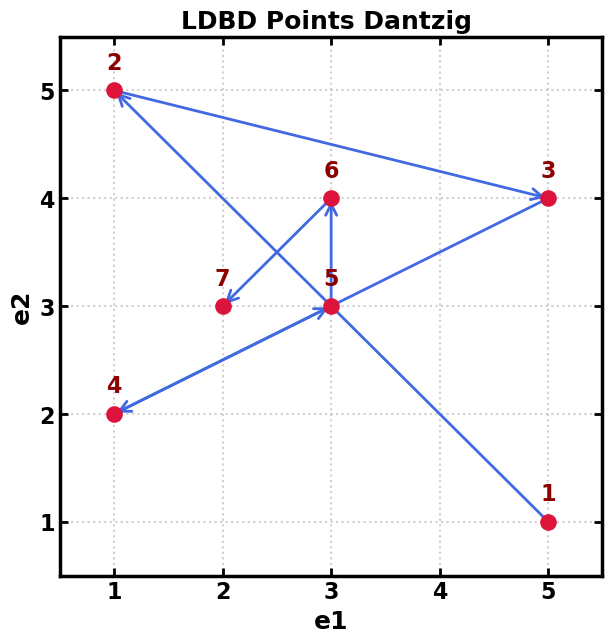

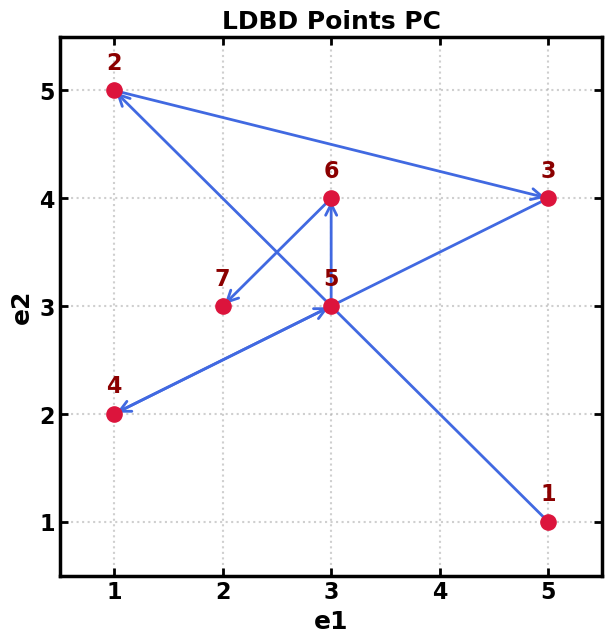

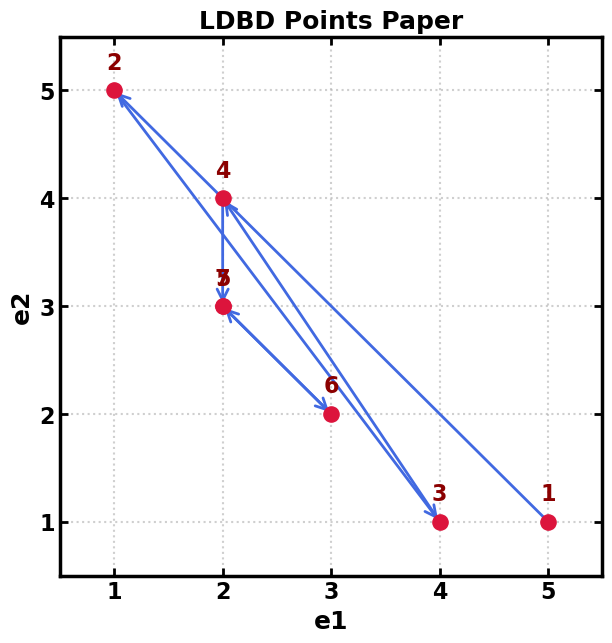

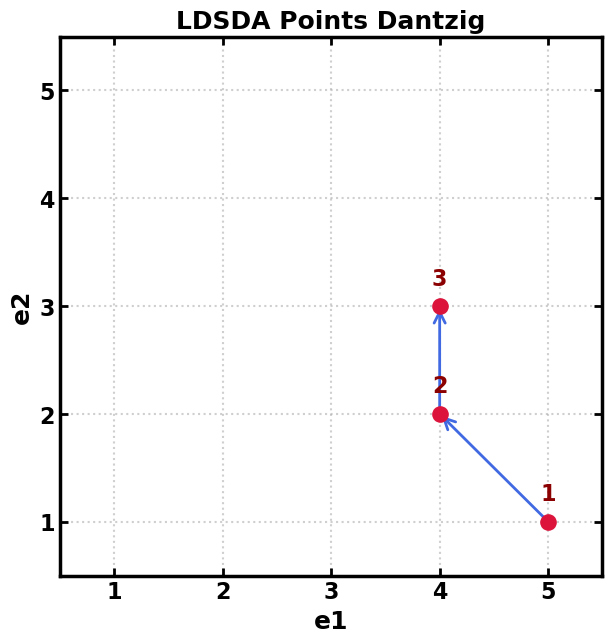

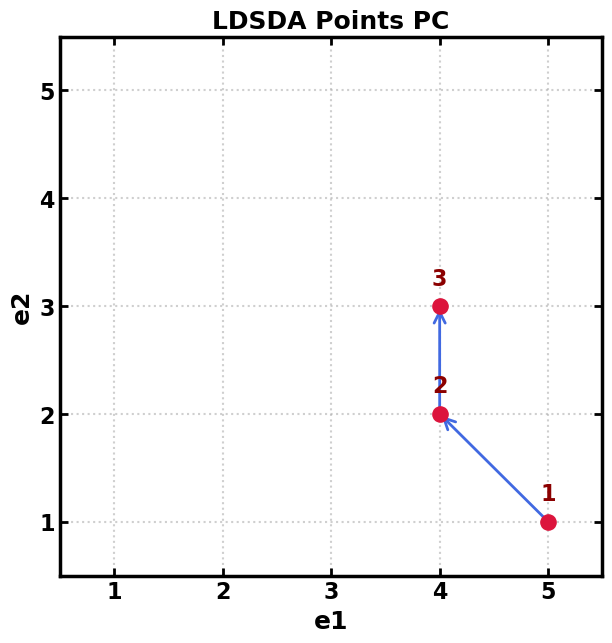

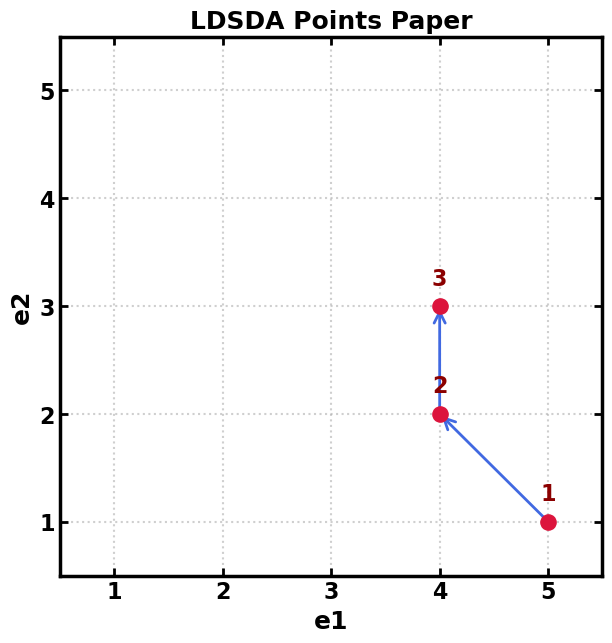

In [ ]:
import os
plot_point_sequence(ldbd_dantzig_points_20260216095139, os.path.join(folder_path, f"ldbd_dantzig_points_{today}.png"), title="LDBD Points Dantzig ")
# plot_point_sequence(ldbd_pc_points, os.path.join(folder_path, f"ldbd_pc_points_{today}.png"), title="LDBD Points PC")
plot_point_sequence(ldbd_paper_points, os.path.join(folder_path, f"ldbd_paper_points_{today}.png"), title="LDBD Points Paper")

plot_point_sequence(ldsda_dantzig_points_20260216095139, os.path.join(folder_path, f"ldsda_dantzig_points_{today}.png"), title="LDSDA Points Dantzig")
# plot_point_sequence(ldsda_pc_points, os.path.join(folder_path, f"ldsda_pc_points_{today}.png"), title="LDSDA Points PC")
plot_point_sequence(ldsda_paper_points, os.path.join(folder_path, f"ldsda_paper_points_{today}.png"), title="LDSDA Points Paper")    


## Small batch


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.ticker import MaxNLocator


# 1. Load CSV data (replace with pd.read_csv('your_file.csv') for your own file)

from io import StringIO

csv_data = fr"D:\Data\Proj\SECQUOIA\Pyomos\LD_benchmark\common_info\compl_enum_small_batch_baron.csv"

df = pd.read_csv(csv_data)

def plot_3d_path_with_missing_nodes(df, sequence, figure_path=None, title=None):
    fig = plt.figure(figsize=(11, 11))
    ax = fig.add_subplot(111, projection='3d')

    # 1. Plot known points (circles)
    scatter = ax.scatter(df['x'], df['y'], df['z'], c=df['Objective'], 
                        cmap='viridis', s=100, label='Optimal Points', edgecolors='k', zorder=5)

    # 2. Find missing points and plot them as triangles
    all_coords = {(i, j, k) for i in range(1, 5) for j in range(1, 5) for k in range(1, 5)}
    existing_coords = set(zip(df['x'], df['y'], df['z']))
    missing_coords = list(all_coords - existing_coords)

    if missing_coords:
        mx, my, mz = zip(*missing_coords)
        ax.scatter(mx, my, mz, marker='^', facecolors='none', edgecolors='gray', 
                s=60, alpha=0.3, label='Infeasible/Missing')

    # 3. Plot the visiting sequence and arrows
    for i in range(len(sequence) - 1):
        start = sequence[i]
        end = sequence[i+1]
        ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], 
                color='blue', lw=2, zorder=10)
        
        ax.quiver(start[0], start[1], start[2], 
                end[0]-start[0], end[1]-start[1], end[2]-start[2], 
                length=0.5, color='blue', normalize=True, arrow_length_ratio=0.3)
    
    # 4. Index annotations
    for idx, (px, py, pz) in enumerate(sequence):
        ax.text(px, py, pz + 0.1, str(idx + 1), color='red', fontsize=16, fontweight='bold')

    # 5. Key change: keep only integer grid points and ticks
    # Use MaxNLocator to force integer tick locations
    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        axis.set_major_locator(MaxNLocator(integer=True))

    # Axis ranges (slightly wider than integers so points do not touch borders)
    ax.set_xlim(0.1, 4.1)
    ax.set_ylim(0.1, 4.1)
    ax.set_zlim(0.1, 4.1)

    # Explicit integer ticks
    ax.set_xticks([1, 2, 3, 4])
    ax.set_yticks([1, 2, 3, 4])
    ax.set_zticks([1, 2, 3, 4])

    # 6. Inner ticks
    ax.tick_params(axis='both', which='major', direction='in', labelsize=12, pad=5)

    # 7. Axis labels (bold, with your LaTeX formatting)
    ax.set_xlabel('Number of Mixers ($Z_E$)', fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel('Number of Reactors ($Z_E$)', fontsize=14, fontweight='bold', labelpad=10)
    ax.set_zlabel('Number of Centrifuges ($Z_E$)', fontsize=14, fontweight='bold', labelpad=10)

    # Colorbar
    fig.colorbar(scatter, ax=ax, label='Objective Value', pad=0.1, shrink=0.6)

    ax.set_title(title if title else '3D Path Visualization', fontsize=18, fontweight='bold')
    plt.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

    if figure_path:
        plt.savefig(figure_path, bbox_inches='tight')
    plt.show()

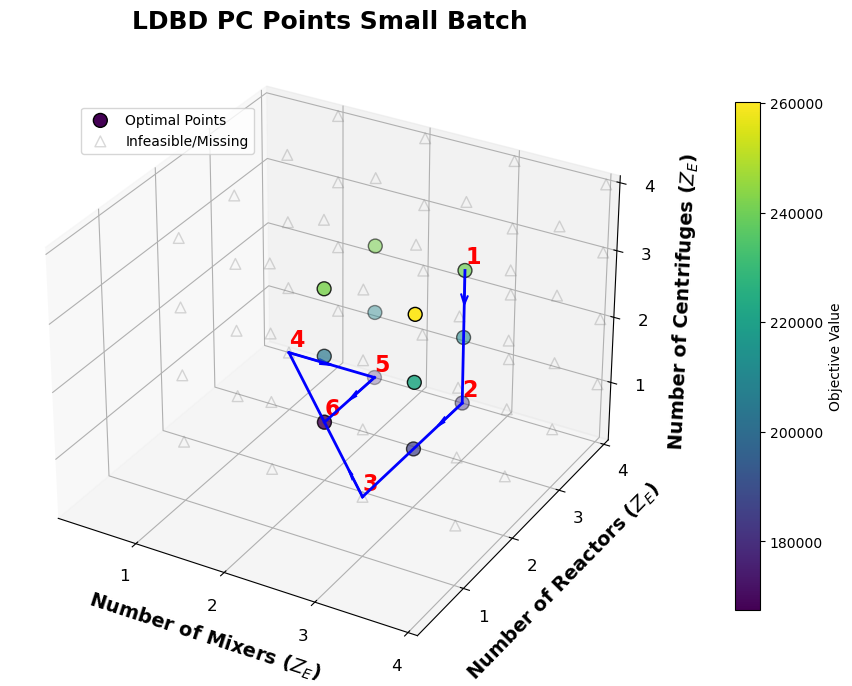

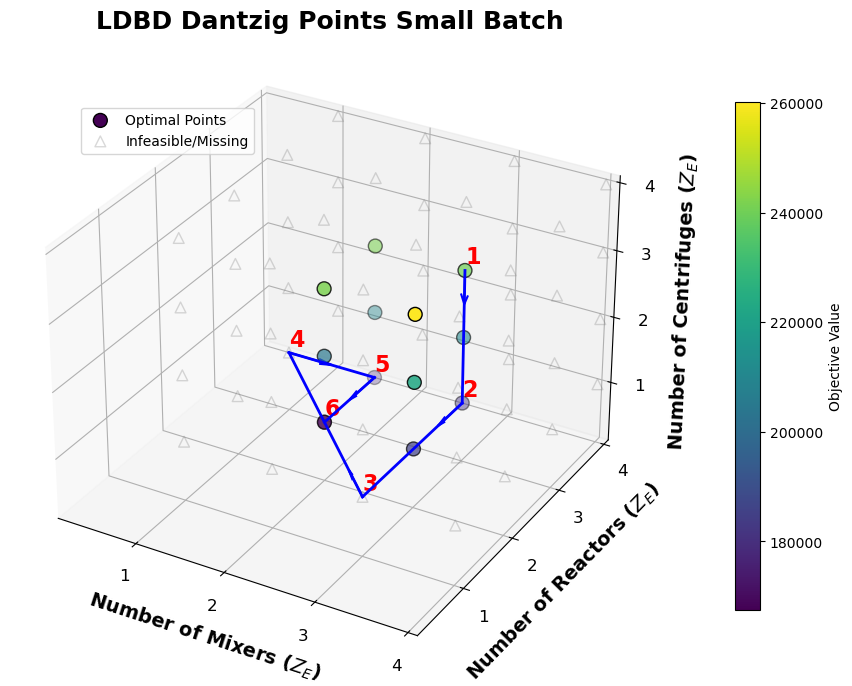

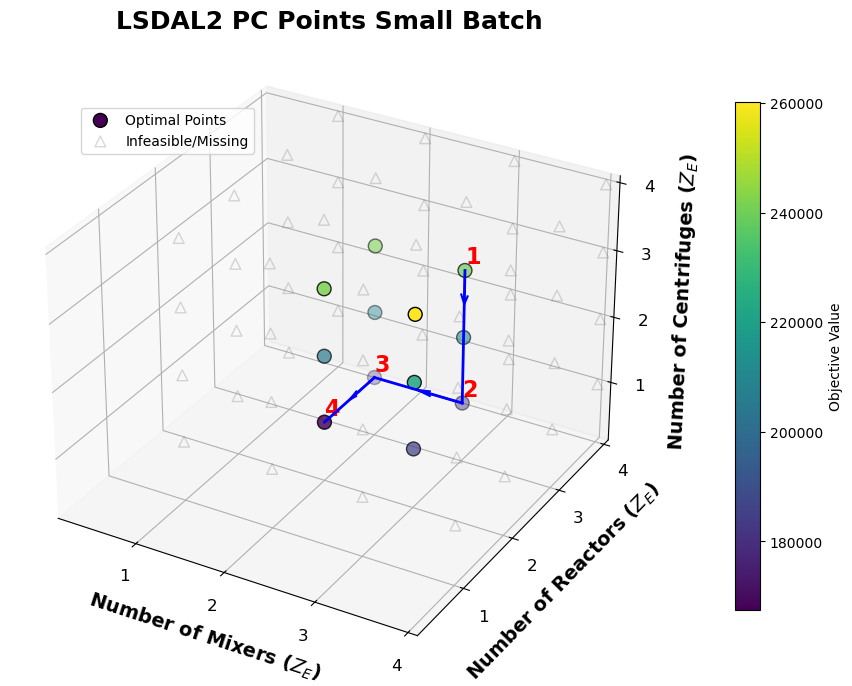

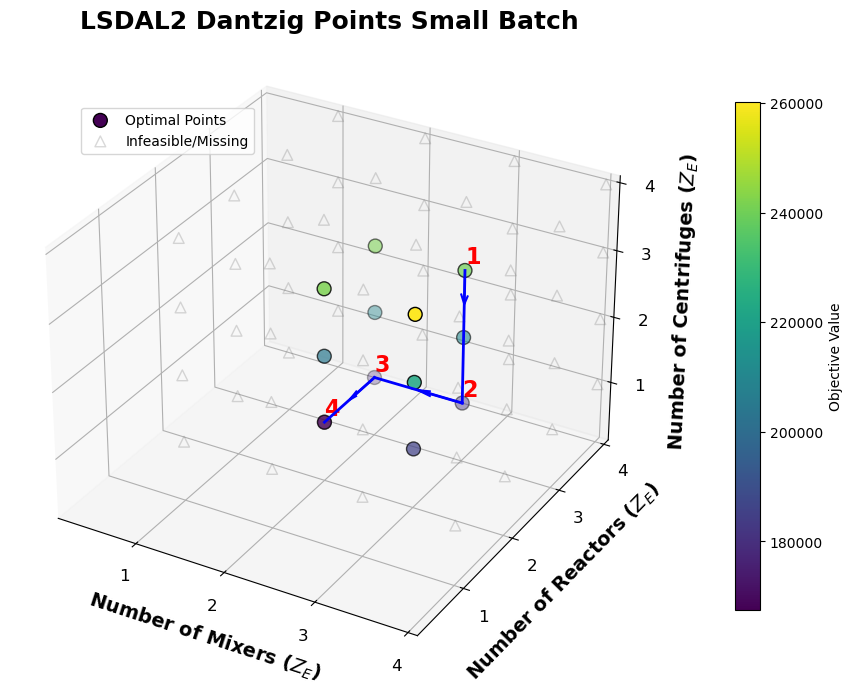

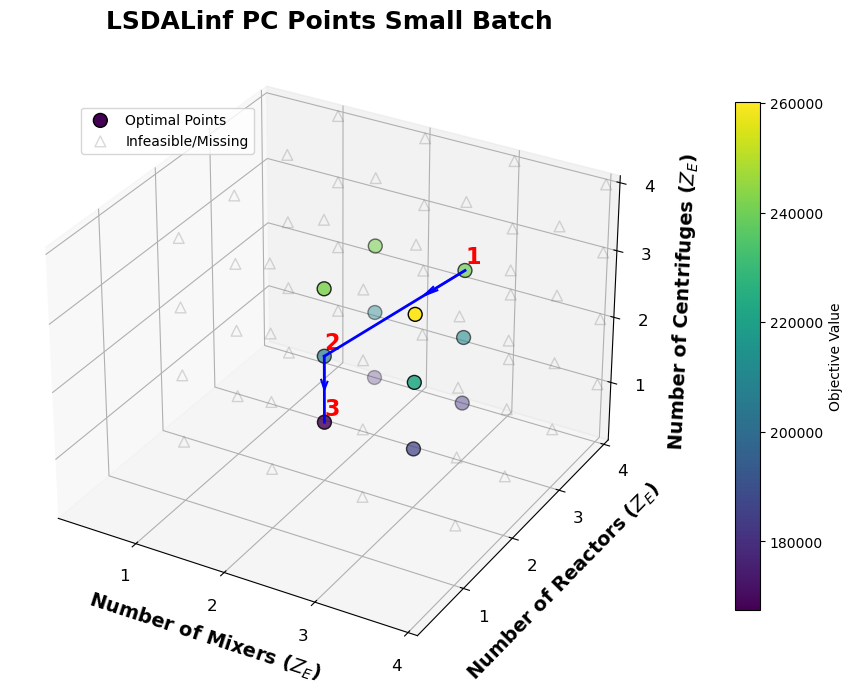

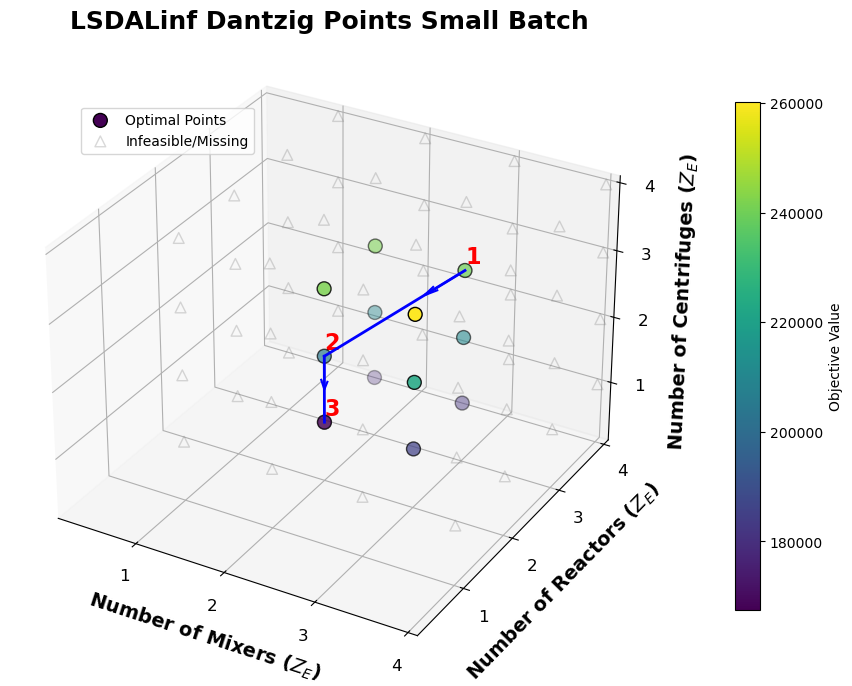

In [ ]:
# ldbd_pc_points_sb = [(3, 3, 3), (3, 3, 1), (3, 1, 1), (1, 3, 1), (2, 3, 1), (2, 2, 1)]
ldbd_dantzig_points_sb = [(3, 3, 3), (3, 3, 1), (3, 1, 1), (1, 3, 1), (2, 3, 1), (2, 2, 1)]

# ldsdal2_pc_points_sb = [(3, 3, 3), (3, 3, 1), (2, 3, 1), (2, 2, 1)]
ldsdal2_dantzig_points_sb = [(3, 3, 3), (3, 3, 1), (2, 3, 1), (2, 2, 1)]
# ldsdalinf_pc_points_sb = [(3, 3, 3), (2, 2, 2), (2, 2, 1)]
ldsdalinf_dantzig_points_sb =[(3, 3, 3), (2, 2, 2), (2, 2, 1)]

# plot_3d_path_with_missing_nodes(df, ldbd_pc_points_sb, os.path.join(folder_path, f"ldbd_pc_points_{today}_sb.png"), title="LDBD PC Points Small Batch")
plot_3d_path_with_missing_nodes(df, ldbd_dantzig_points_sb, os.path.join(folder_path, f"ldbd_dantzig_points_{today}_sb.png"), title="LDBD Dantzig Points Small Batch")

# plot_3d_path_with_missing_nodes(df, ldsdal2_pc_points_sb, os.path.join(folder_path, f"lsdal2_pc_points_{today}_sb.png"), title="LSDAL2 PC Points Small Batch")
plot_3d_path_with_missing_nodes(df, ldsdal2_dantzig_points_sb, os.path.join(folder_path, f"lsdal2_dantzig_points_{today}_sb.png"), title="LSDAL2 Dantzig Points Small Batch")
# plot_3d_path_with_missing_nodes(df, ldsdalinf_pc_points_sb, os.path.join(folder_path, f"lsdalinf_pc_points_{today}_sb.png"), title="LSDALinf PC Points Small Batch")
plot_3d_path_with_missing_nodes(df, ldsdalinf_dantzig_points_sb, os.path.join(folder_path, f"lsdalinf_dantzig_points_{today}_sb.png"), title="LSDALinf Dantzig Points Small Batch")


## Column test

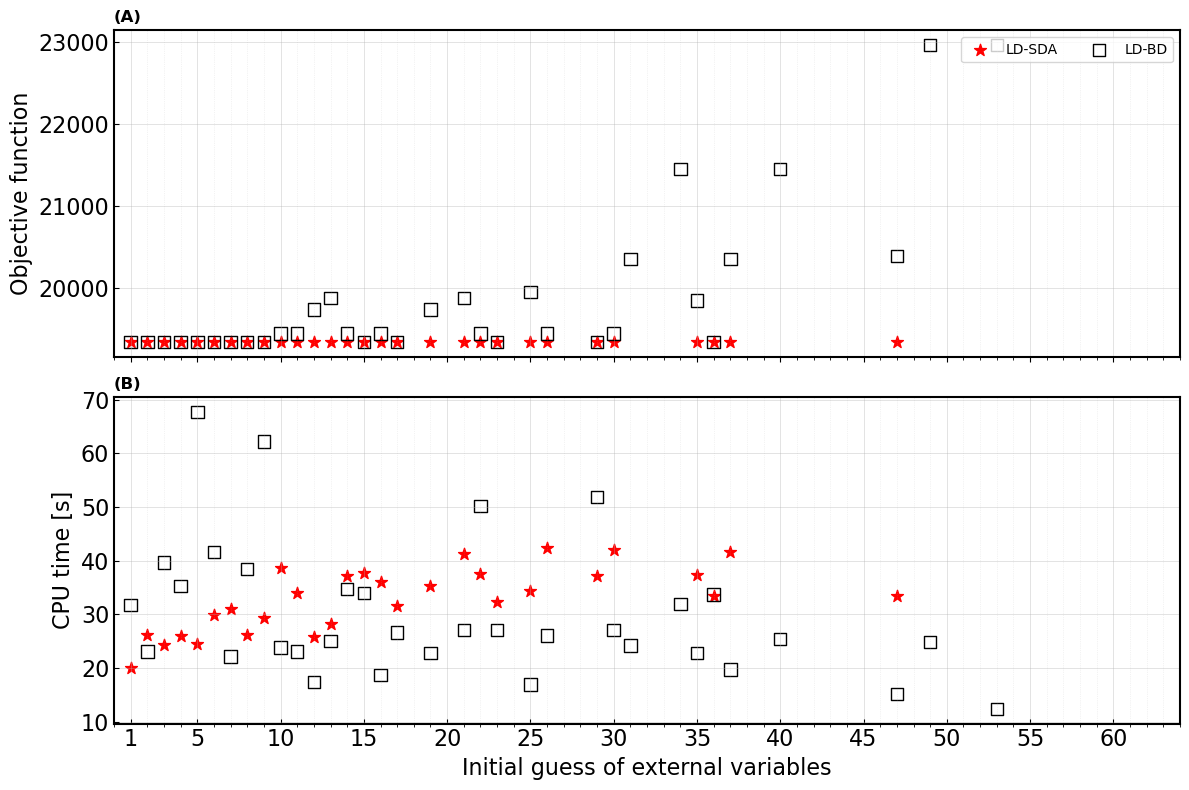

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from matplotlib.ticker import MultipleLocator

# 1. Load data
csv_file = fr"D:\Data\Proj\SECQUOIA\Pyomos\test_ldbd_ldsda\column_test\column_results\column_test_{today}.csv"

df = pd.read_csv(csv_file)

# Key change: filter out rows with missing objective_value so those points are not plotted
df_clean = df.dropna(subset=['objective_value'])

# 2. Plot styling and configuration
style_map = {
    'LDSDA': {'marker': '*', 'color': 'red', 'label': 'LD-SDA'},
    'LDBD': {'marker': 's', 'color': 'black', 'label': 'LD-BD', 'fillstyle': 'none'},
    'LOA': {'marker': '^', 'color': 'blue', 'label': 'L-OA', 'fillstyle': 'none'}
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 3. Plot helper (reduces repeated code)
def plot_data(ax, y_col, is_top=False):
    for alg in df_clean['Algorithm'].unique():
        subset = df_clean[df_clean['Algorithm'] == alg]
        style = style_map.get(alg, {'marker': 'o', 'color': 'gray'})
        
        ax.scatter(subset['initial_point_key'], subset[y_col], 
                   marker=style['marker'], color=style['color'], 
                   label=style.get('label') if is_top else None, s=80, 
                   facecolors=style['color'] if 'fillstyle' not in style else 'none')

plot_data(ax1, 'objective_value', is_top=True)
plot_data(ax2, 'cpu_time')

# 4. Grid and ticks
for ax in [ax1, ax2]:
    # Major ticks: show a number every 5
    ax.xaxis.set_major_locator(MultipleLocator(5))
    # Minor ticks: one per grid point (1, 2, 3...), but no labels
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    
    # Draw grids for both major and minor ticks
    # Major grid slightly thicker; minor grid dotted
    ax.grid(which='major', linestyle='-', linewidth=0.5, alpha=0.5)
    ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.3)
    
    # Axis range
    ax.set_xlim(0, 64)

# 5. Finishing touches
ax1.tick_params(axis='y', direction='in', labelsize=16)

ax1.set_ylabel('Objective function', fontsize=16)

ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)
ax1.set_title('(A)', loc='left', fontweight='bold')
ax1.legend(loc='upper right', ncol=3)

# Adjust the size of the x ticks and labels inward
ax2.tick_params(axis='x',direction='in', labelsize=16)
ax2.tick_params(axis='y', direction='in', labelsize=16)

# Adjust axis line thickness
ax2.spines['top'].set_linewidth(1.5)
ax2.spines['right'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.spines['left'].set_linewidth(1.5)
ax2.set_ylabel('CPU time [s]', fontsize=16)
ax2.set_xlabel('Initial guess of external variables', fontsize=16)
ax2.set_title('(B)', loc='left', fontweight='bold')

# Special: force tick 1 to appear
xticks = [1] + list(range(5, 65, 5))
ax2.set_xticks(xticks)

plt.tight_layout()
plt.show()

## CSTR Data

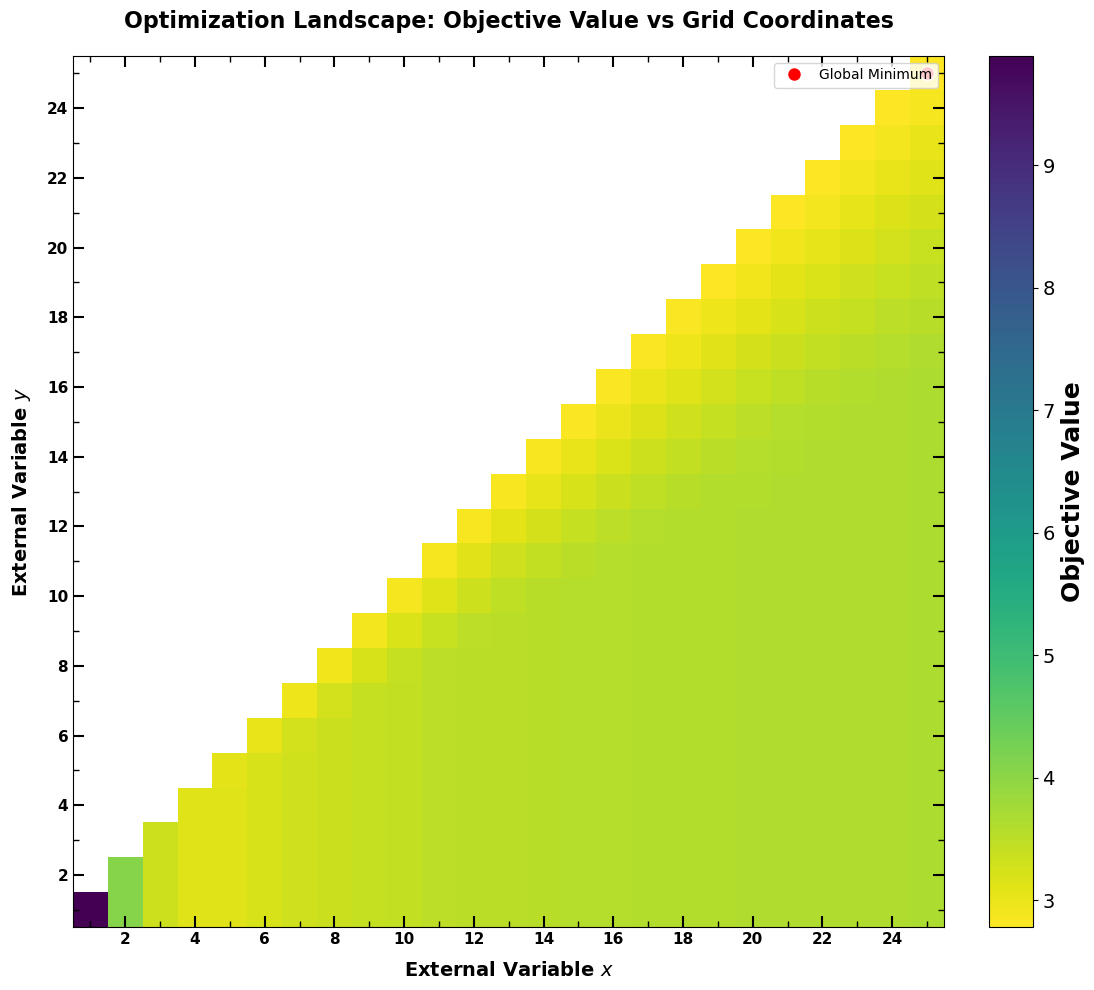

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
from matplotlib.ticker import MultipleLocator

# 1. Load your full dataset

# Note: Replace the ... with your full text or use pd.read_csv('your_file.csv')
csv_file = r"D:\Data\Proj\SECQUOIA\Pyomos\ldbd_test\cstr_testing\compl_enum_cstr_25_baron.csv"
df = pd.read_csv(csv_file)

# 2. Reshape data using pivot_table (handles the duplicate [25, 25] entry)
# We take the minimum Objective value if a coordinate is repeated
pivot_df = df.pivot_table(index='y', columns='x', values='Objective', aggfunc='min')

# 3. Initialize Plot
plt.rcParams['font.family'] = 'sans-serif'
fig, ax = plt.subplots(figsize=(12, 10))

# 4. Create Heatmap
# 'viridis_r' makes lower values (better) brighter or distinct
im = ax.imshow(pivot_df, origin='lower', cmap='viridis_r', aspect='equal',
               extent=[df.x.min()-0.5, df.x.max()+0.5, df.y.min()-0.5, df.y.max()+0.5])

# 5. Styling Ticks (Inner Ticks & Bold)
ax.xaxis.set_major_locator(MultipleLocator(2)) # Tick every 2 units for clarity
ax.yaxis.set_major_locator(MultipleLocator(2))

ax.tick_params(axis='both', which='major', direction='in', length=8, width=1.5, 
               top=True, right=True, labelsize=11)
ax.tick_params(axis='both', which='minor', direction='in', length=4, width=1, 
               top=True, right=True)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

# 6. Labels and Title
ax.set_xlabel('External Variable $x$', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('External Variable $y$', fontsize=14, fontweight='bold', labelpad=10)
ax.set_title('Optimization Landscape: Objective Value vs Grid Coordinates', 
             fontsize=16, fontweight='bold', pad=20)

# 7. Add Colorbar
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Objective Value', fontsize=18, fontweight='bold')
cbar.ax.tick_params(labelsize=14)

# 8. Highlight the Global Minimum
min_val = df['Objective'].min()
min_point = df[df['Objective'] == min_val].iloc[0]
ax.plot(min_point['x'], min_point['y'], 'ro', markersize=10, markeredgecolor='white', label='Global Minimum')
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

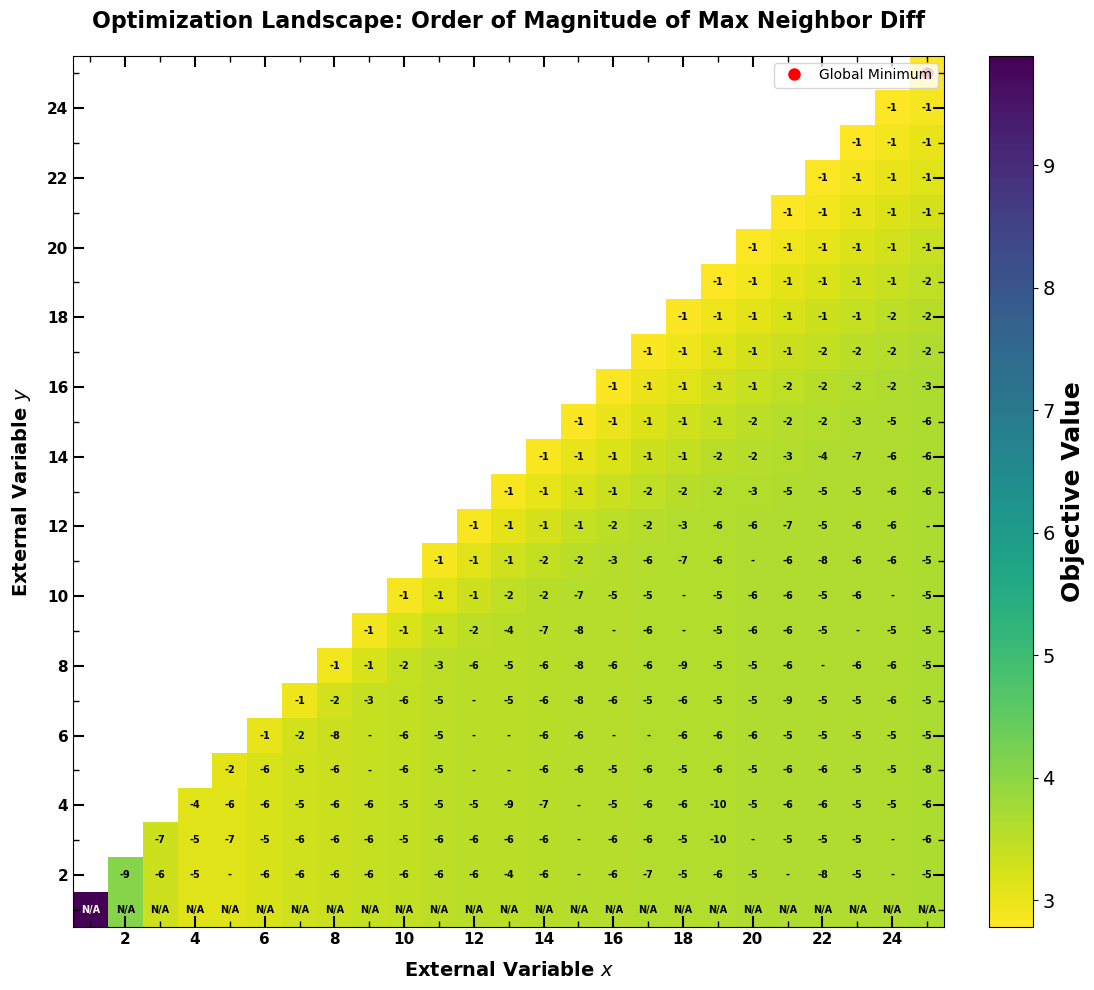

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
from matplotlib.ticker import MultipleLocator
import math

# 1. Load your full dataset
csv_file = r"D:\Data\Proj\SECQUOIA\Pyomos\ldbd_test\cstr_testing\compl_enum_cstr_25_baron.csv"
# df = pd.read_csv(csv_file)


df = pd.read_csv(csv_file)
# -----------------------------------------------------------

# 2. Reshape data using pivot_table (handles the duplicate [25, 25] entry)
pivot_df = df.pivot_table(index='y', columns='x', values='Objective', aggfunc='min')

# 3. Initialize plot
plt.rcParams['font.family'] = 'sans-serif'
fig, ax = plt.subplots(figsize=(12, 10))

# 4. Create heatmap
# 'viridis_r': minimum values appear light/yellow; maximum values appear dark/purple
im = ax.imshow(pivot_df, origin='lower', cmap='viridis_r', aspect='equal',
               extent=[df.x.min()-0.5, df.x.max()+0.5, df.y.min()-0.5, df.y.max()+0.5])

# 5. Additional logic: compute neighbor-difference magnitude annotations
y_indices = pivot_df.index
x_cols = pivot_df.columns
# Used to adapt text color: for dark backgrounds (large values) use white text; for light backgrounds use black text
mid_val = (pivot_df.max().max() + pivot_df.min().min()) / 2 

# for i in range(len(y_indices)):
#     for j in range(len(x_cols)):
#         center_val = pivot_df.iloc[i, j]
#         
#         # Skip if this cell has no data
#         if pd.isna(center_val):
#             continue
#             
#         max_diff = 0.0
#         
#         # Iterate over the 8 neighboring cells (relative offsets -1 to 1)
#         for di in [-1, 0, 1]:
#             for dj in [-1, 0, 1]:
#                 # Exclude the cell itself
#                 if di == 0 and dj == 0:
#                     continue
#                 
#                 ni = i + di
#                 nj = j + dj
#                 
#                 # Ensure neighbor indices are within bounds
#                 if 0 <= ni < len(y_indices) and 0 <= nj < len(x_cols):
#                     neighbor_val = pivot_df.iloc[ni, nj]
#                     # Only consider valid neighbor values
#                     if not pd.isna(neighbor_val):
#                         diff = abs(center_val - neighbor_val)
#                         if diff > max_diff:
#                             max_diff = diff

#         # Order of magnitude
#         # If max_diff is larger than a tiny value (avoid log10 issues when diff is 0)
#         if max_diff > 1e-12:
#             magnitude = int(np.floor(np.log10(max_diff)))
#             text_str = f"{magnitude}"
#         else:
#             text_str = "0"  # All neighbors identical or difference extremely small
#             
#         # Choose text color based on background intensity for readability
#         text_color = 'white' if center_val > mid_val else 'black'
#         
#         # Add text annotation at the corresponding x/y coordinates
#         x_coord = x_cols[j]
#         y_coord = y_indices[i]
#         ax.text(x_coord, y_coord, text_str, ha='center', va='center',
#                 color=text_color, fontweight='bold', fontsize=8)

# for i in range(len(y_indices)):
#     for j in range(len(x_cols)):
#         center_val = pivot_df.iloc[i, j]
#         if pd.isna(center_val):
#             continue
#             
#         diffs = []  # Store differences to all valid neighbors
#         
#         for di in [-1, 0, 1]:
#             for dj in [-1, 0, 1]:
#                 if di == 0 and dj == 0: continue
#                 ni, nj = i + di, j + dj
#                 
#                 if 0 <= ni < len(y_indices) and 0 <= nj < len(x_cols):
#                     neighbor_val = pivot_df.iloc[ni, nj]
#                     if not pd.isna(neighbor_val):
#                         d = abs(center_val - neighbor_val)
#                         # Exclude exactly-equal values (diff=0) to avoid log10 issues
#                         if d > 1e-15:
#                             diffs.append(d)
#                             
#         # If there are non-zero neighbor differences
#         if diffs:
#             min_diff = min(diffs)
#             magnitude = int(np.floor(np.log10(min_diff)))
#             text_str = f"{magnitude}"
#         else:
#             # All neighbors missing or identical to the center
#             text_str = "N/A"
#             
#         text_color = 'white' if center_val > mid_val else 'black'
#         x_coord, y_coord = x_cols[j], y_indices[i]
#         
#         ax.text(x_coord, y_coord, text_str, ha='center', va='center',
#                 color=text_color, fontweight='bold', fontsize=7)

for i in range(len(y_indices)):
    for j in range(len(x_cols)):
        center_val = pivot_df.iloc[i, j]
        
        # If this cell has no valid value (e.g., blank region), skip it
        if pd.isna(center_val):
            continue
            
        # Check if there is a cell below (i > 0 ensures not the bottom row)
        if i > 0:
            below_val = pivot_df.iloc[i-1, j]
            # Ensure the cell below also has a value
            if not pd.isna(below_val):
                diff = abs(center_val - below_val)
                # Exclude exactly-equal values (diff = 0)
                if diff > 1e-15:
                    magnitude = int(np.floor(np.log10(diff)))
                    text_str = f"{magnitude}"
                else:
                    text_str = "-"  # Difference is ~0
            else:
                text_str = "N/A"  # The cell directly below is empty
        else:
            # Bottom row (y=1): no cell below
            text_str = "N/A"
            
        # Adapt text color to background intensity
        text_color = 'white' if center_val > mid_val else 'black'
        x_coord = x_cols[j]
        y_coord = y_indices[i]
        
        ax.text(x_coord, y_coord, text_str, ha='center', va='center',
                color=text_color, fontweight='bold', fontsize=7)

# 6. Styling ticks (inner ticks & bold)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(2))

ax.tick_params(axis='both', which='major', direction='in', length=8, width=1.5,
               top=True, right=True, labelsize=11)
ax.tick_params(axis='both', which='minor', direction='in', length=4, width=1,
               top=True, right=True)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

# 7. Labels and title
ax.set_xlabel('External Variable $x$', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('External Variable $y$', fontsize=14, fontweight='bold', labelpad=10)
ax.set_title('Optimization Landscape: Order of Magnitude of Max Neighbor Diff',
             fontsize=16, fontweight='bold', pad=20)

# 8. Add colorbar
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Objective Value', fontsize=18, fontweight='bold')
cbar.ax.tick_params(labelsize=14)

# 9. Highlight the global minimum
min_val = df['Objective'].min()
min_point = df[df['Objective'] == min_val].iloc[0]
ax.plot(min_point['x'], min_point['y'], 'ro', markersize=10, markeredgecolor='white', label='Global Minimum')
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

* Local Sensitivity (Numerical Annotations): 
  * Each cell is annotated with an integer representing the order of magnitude of the minimum difference between that cell and its eight immediate neighbors.
  * Higher negative values (e.g., $-6$ to $-10$) indicate "flat" regions where the objective function is highly stable and changes very little with respect to the external variables.
  * Lower negative values (e.g., $-2$ or $-3$) highlight regions with steeper gradients or higher local sensitivity.

## CSTR Traj

In [ ]:
def plot_point_sequence(points, figure_path=None, title=None):
    e1_coords = [p[0] for p in points]
    e2_coords = [p[1] for p in points]

    fig, ax = plt.subplots(figsize=(7, 7))

    # 1. Draw the sequential path with arrows
    for i in range(len(points) - 1):
        ax.annotate('', xy=points[i+1], xytext=points[i],
                    arrowprops=dict(arrowstyle='->', color='royalblue', lw=2, mutation_scale=20))

    # 2. Draw scatter points
    ax.scatter(e1_coords, e2_coords, color='crimson', s=120, zorder=5)
    for i, (x, y) in enumerate(points):
        ax.text(x, y + 0.15, str(i + 1), fontsize=16, color='darkred', 
                fontweight='bold', ha='center', va='bottom')

    # 3. Set tick direction and style
    # Key change: direction='in' sets ticks inward
    ax.tick_params(axis='both', which='both', direction='in', labelsize=16, width=2, length=6, top=True, right=True)
    
    # Make tick labels bold
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    # 4. Set axis border thickness (spines)
    axis_thickness = 2.5
    for spine in ax.spines.values():
        spine.set_linewidth(axis_thickness)

    # 5. Axis labels (bold)
    ax.set_xlabel('e1', fontsize=18, fontweight='bold')
    ax.set_ylabel('e2', fontsize=18, fontweight='bold')

    # 6. Strictly control integer grid points and range
    # Limit the range slightly beyond [1, 5] so edge points are fully visible
    ax.set_xlim(0.5, 5.5)
    ax.set_ylim(0.5, 5.5)
    
    # Explicit integer ticks (1, 2, 3, 4, 5)
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_yticks([1, 2, 3, 4, 5])
    
    # Enable grid aligned with integer ticks
    ax.grid(True, which='major', linestyle=':', alpha=0.6, lw=1.5)

    if title:
        ax.set_title(title, fontsize=18, fontweight='bold')
    else:
        ax.set_title('Point Sequence', fontsize=18, fontweight='bold')

    if figure_path:
        plt.savefig(figure_path, bbox_inches='tight')
    plt.show()

# Test call
